# 机器学习建议实践

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import logging

logging.getLogger("tensorflow").setLevel(logging.ERROR)
from public_tests_a1 import *
tf.keras.backend.set_floatx('float64')
from assigmant_utils import *
tf.autograph.set_verbosity(0)

In [2]:
X, y,x_ideal,y_ideal = gen_data(18,2,0.7)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)

In [29]:
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


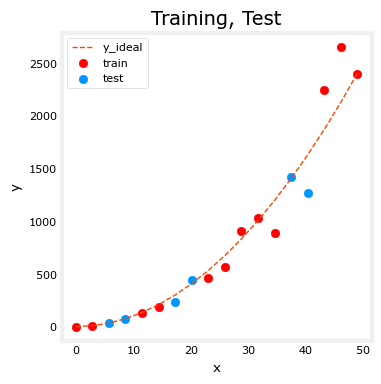

In [30]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color="orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.scatter(X_train, y_train, color="red", label="train")
ax.scatter(X_test, y_test, color=dlc["dlblue"], label="test")
ax.legend()
plt.show()

In [31]:
def eval_mse(y, yhat):
    m = len(y)
    err = 0
    for i in range(m):
        err += (y[i] - yhat[i]) ** 2
    return err / m

In [32]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
print(eval_mse(y_tmp, y_hat))


0.010000000000000061


In [33]:
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)
print(err_train)
print(yhat.shape)

yhat_test = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat_test)
print(err_test)


58.00756048496032
(12,)
171215.01159272724


In [34]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


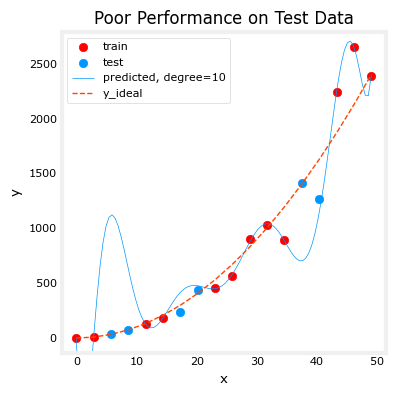

In [35]:
x=np.linspace(0,max(X),100)
yhat_pred = lmodel.predict(x)
plt_train_test(X_train, y_train, X_test, y_test, x, yhat_pred, x_ideal, y_ideal, degree)


In [36]:
X,y,x_ideal,y_ideal = gen_data(40,2,0.7)
print(X.shape, y.shape, x_ideal.shape, y_ideal.shape)

(40,) (40,) (40,) (40,)


In [37]:
X_train,X_,y_train,y_ = train_test_split(X,y,test_size=0.4,random_state=1)
print(X_train.shape, y_train.shape, X_.shape, y_.shape)

(24,) (24,) (16,) (16,)


In [38]:
X_cv,X_test,y_cv,y_test = train_test_split(X_,y_,test_size=0.5,random_state=1)
print(X_cv.shape, y_cv.shape, X_test.shape, y_test.shape)


(8,) (8,) (8,) (8,)


/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Verdana.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) Verdana.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23637 (\N{CJK UNIFIED IDEOGRAPH-5C55}) missing from font(s) Verdana.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from font(s) Verdana

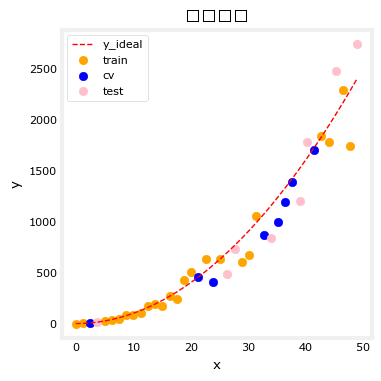

In [39]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, '--', color="red", label="y_ideal", lw=1)
ax.set_title("数据展示")
ax.set_ylabel("y")
ax.set_xlabel("x")

ax.scatter(X_train, y_train, color="orange", label="train")
ax.scatter(X_cv, y_cv, color="blue", label="cv")
ax.scatter(X_test, y_test, color="pink", label="test")
plt.legend()
plt.show()

In [40]:
max_degree =9
err_train=np.zeros(max_degree)
err_cv=np.zeros(max_degree)
x=np.linspace(0, int(X.max()), 100)
print(x.shape)
y_pred = np.zeros((100, max_degree))

(100,)


In [41]:
for i in range(max_degree):
    l_model = lin_model(i+1)
    l_model.fit(X_train, y_train)
    yhat= l_model.predict(X_train)
    err_train[i] = l_model.mse(yhat, y_train)
    yhat_cv = l_model.predict(X_cv)
    err_cv[i] = l_model.mse(yhat_cv, y_cv)
    y_pred[:,i]= l_model.predict(x)
optimal_degree = np.argmin(err_cv)+1
print(optimal_degree)

6


In [42]:
plt.close("all")

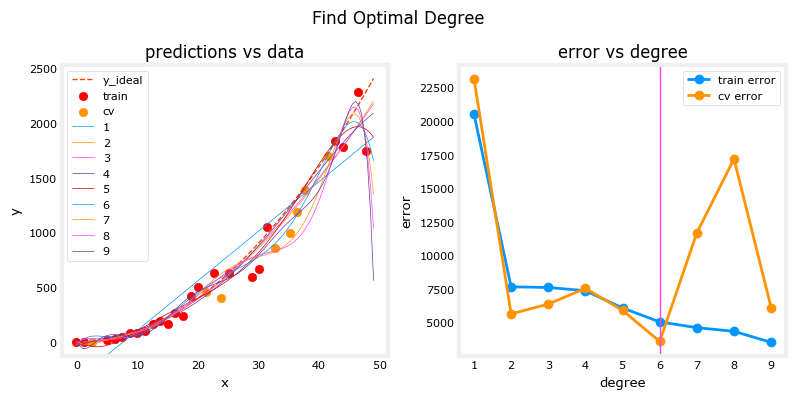

In [43]:
plt_optimal_degree(X_train, y_train,X_cv,y_cv,x,y_pred,x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

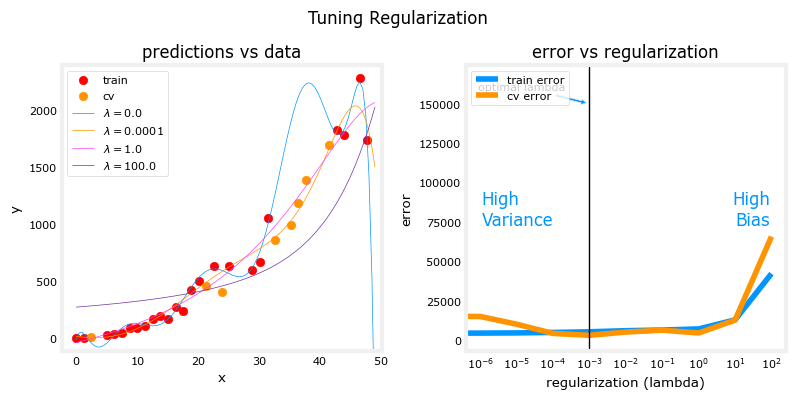

In [44]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
lambda_len = len(lambda_range)
err_tarin = np.zeros(lambda_len)
err_cv=np.zeros(lambda_len)
degree =10
x=np.linspace(0, max(X), 100)
y_pred=np.zeros((100, lambda_len))

for i in range(lambda_len):
    line_model = lin_model(degree=degree, regularization=True, lambda_=lambda_range[i])
    line_model.fit(X_train, y_train)
    y_hat = line_model.predict(X_train)
    err_tarin[i] = line_model.mse(y_train, y_hat)
    yhat_cv=line_model.predict(X_cv)
    err_cv[i]=line_model.mse(y_cv, yhat_cv)
    y_pred[:,i] = line_model.predict(x)

optimal_reg_idx = np.argmin(err_cv)
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_tarin, err_cv, optimal_reg_idx, lambda_range)

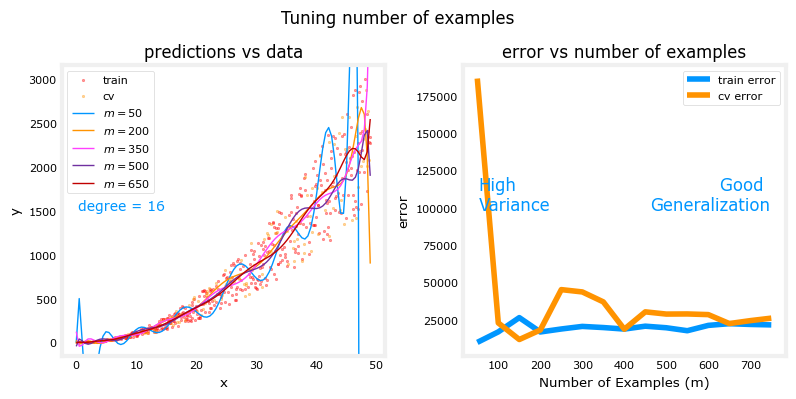

In [45]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

In [46]:
X, y, centers, classes, std = gen_blobs()
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


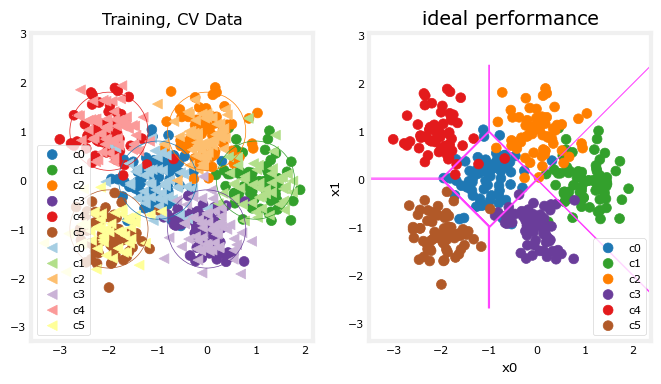

In [47]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std )

In [48]:
def eval_cat_err(y_hat, y):
    num = len(y_hat)
    incorrent =0
    for i in range(num):
        if y_hat[i] != y[i]:
            incorrent+=1
    return incorrent/num

In [49]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )


categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250


In [50]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)

model = Sequential([
    Dense(120,activation='relu',name="l1"),
    Dense(40, activation='relu', name="l2"),
    Dense(classes,activation='linear', name="l3")
],name="Complex")
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(0.01)),

model.fit(
    X_train, y_train,epochs=10
)



Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 1.2983
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.3763
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.3417
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 0.2499
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.2280
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.2218
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.2068
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.2018
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.1992
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.1982


In [51]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)

1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step


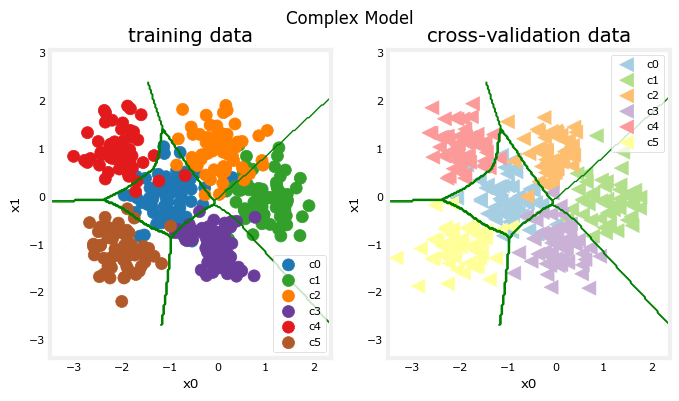

In [52]:
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

In [53]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
categorization error, training, complex model: 0.072
categorization error, cv,       complex model: 0.062


In [60]:
tf.random.set_seed(1234)

model_s = Sequential(
    [
        Dense(6, activation='relu', name="l1"),
        Dense(6, activation="linear", name="l2")
    ],name="Simple"
)

model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01)
)

In [61]:
import logging

model_s.fit(
    X_train,y_train,epochs=1000
)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 2.0110
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 1.6282
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 1.3817
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 1.1826
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.9982
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.8443
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 0.7244
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.6277
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.5492
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.4848
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.4318
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.3888
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 0.3526
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.3271
Epoch 15/1000
13/13 ━━━━━━━━━

In [62]:
model_s.summary()

Model: "Simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ l1 (Dense)                      │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2 (Dense)                      │ (None, 6)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182 (1.42 KB)

 Trainable params: 60 (480.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 122 (976.00 B)

In [64]:
# model_s_test(model_s, classes, X_train.shape[1])

AttributeError: The layer Simple has never been called and thus has no defined input.

In [65]:
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(), axis=1)

1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step


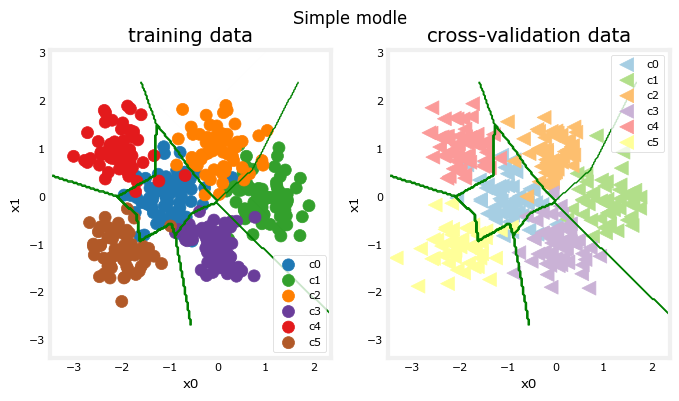

In [66]:
plt_nn(model_predict_s,X_train,y_train, classes,X_cv, y_cv, suptitle="Simple modle")

In [68]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
categorization error, training, simple model, 0.068, complex model: 0.072
categorization error, cv,       simple model, 0.081, complex model: 0.062


In [71]:
tf.random.set_seed(1234)
model_r = Sequential([
    Dense(120, activation="relu", name="l1"),
    Dense(40, activation="relu", name="l2"),
    Dense(6, activation="linear", name="l3")
], name= "Test")

model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01)
)

In [72]:
model_r.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 1.3918
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.4179
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.3427
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.2601
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.2290
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.2117
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.2064
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 0.2028
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 0.1970
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.1929
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.1942
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.1894
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.1890
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1873  
Epoch 15/1000
13/13 ━━━━━━━━━

In [73]:
model_r.summary()

Model: "Test"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ l1 (Dense)                      │ (None, 120)            │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2 (Dense)                      │ (None, 40)             │         4,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l3 (Dense)                      │ (None, 6)              │           246 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,340 (127.66 KB)

 Trainable params: 5,446 (42.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,894 (85.11 KB)

In [75]:
# model_r_test(model_r, classes, X_train.shape[1])

1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step


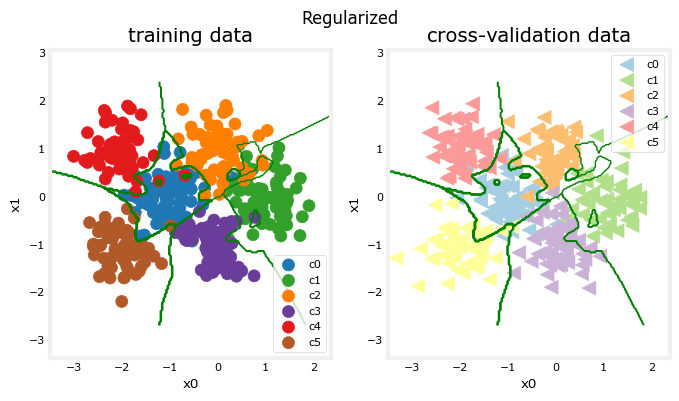

In [76]:
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

In [77]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
categorization error, training, regularized: 0.005, simple model, 0.068, complex model: 0.072
categorization error, cv,       regularized: 0.097, simple model, 0.081, complex model: 0.062


In [78]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 1.3013
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.4331
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.3369
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.2870
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.2425
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.2304
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.2160
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.2046
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.2001
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 0.1998
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.1967
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.1951
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 0.1933
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 0.1915
Epoch 15/1000
13/13 ━━━━━━━━━

In [ ]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)